In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
game_data = pd.read_csv('~/baycats/pitches_tracked_game_data/20230816BRABAR1_pt.csv')
game_data.head()

,game_date,game_pk,away_team,home_team,game_type,game_year,sv_id,batter,pitcher,stand,...,post_bat_score,post_fld_score,woba_value,woba_denom,babip_value,iso_value,role_key,pitch_number_appearance,pitcher_at_bat_number,times_faced
0,2023-08-16,20230816BRABAR1,BRA,BAR,R,2023,20230816BRABAR1-01,Matthew Fabian,Aidan Rossel,R,...,0,0,NaN,NaN,NaN,NaN,SP,1,1,1
1,2023-08-16,20230816BRABAR1,BRA,BAR,R,2023,20230816BRABAR1-01,Matthew Fabian,Aidan Rossel,R,...,0,0,NaN,NaN,NaN,NaN,SP,2,1,1
2,2023-08-16,20230816BRABAR1,BRA,BAR,R,2023,20230816BRABAR1-01,Matthew Fabian,Aidan Rossel,R,...,0,0,NaN,NaN,NaN,NaN,SP,3,1,1
3,2023-08-16,20230816BRABAR1,BRA,BAR,R,2023,20230816BRABAR1-01,Matthew Fabian,Aidan Rossel,R,...,0,0,NaN,NaN,NaN,NaN,SP,4,1,1
4,2023-08-16,20230816BRABAR1,BRA,BAR,R,2023,20230816BRABAR1-01,Matthew Fabian,Aidan Rossel,R,...,0,0,NaN,NaN,NaN,NaN,SP,5,1,1


In [3]:
game_data['count'] = game_data['balls'].astype(str).str.cat(game_data['strikes'].astype(str), sep ='-')

In [4]:
game_data['count_advantage'] = 'neutral'
game_data.loc[(game_data['count'] == '1-0') | (game_data['count'] == '2-0') | (game_data['count'] == '2-1') | (game_data['count'] == '3-0') | (game_data['count'] == '3-1'), 'count_advantage'] = 'batter'
game_data.loc[(game_data['count'] == '0-1') | (game_data['count'] == '0-2') | (game_data['count'] == '1-2'), 'count_advantage'] = 'pitcher'

In [5]:
game_data['CH'] = game_data['pitch_type'] == 'CH'
game_data['CH'] = game_data['CH'].replace({True: 1, False: 0})

game_data['CU'] = game_data['pitch_type'] == 'CU'
game_data['CU'] = game_data['CU'].replace({True: 1, False: 0})

game_data['FF'] = game_data['pitch_type'] == 'FF'
game_data['FF'] = game_data['FF'].replace({True: 1, False: 0})

In [6]:
delugo_data = game_data[game_data['pitcher'] == 'Ricardo DeLugo']

In [12]:
delugo_stand_pct = delugo_data.groupby('stand').agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'FF_pct': 3})
delugo_stand_pct

,N,CH_pct,CU_pct,FF_pct
stand,,,,
L,28,0.250,0.179,0.571
R,34,0.294,0.176,0.529


In [8]:
delugo_data.groupby('count').agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'FF_pct': 3})

,N,CH_pct,CU_pct,FF_pct
count,,,,
0-0,21,0.286,0.190,0.524
0-1,6,0.500,0.000,0.500
0-2,5,0.000,0.600,0.400
1-0,7,0.143,0.000,0.857
1-1,7,0.571,0.286,0.143
1-2,6,0.167,0.167,0.667
2-0,3,0.000,0.333,0.667
2-1,1,0.000,0.000,1.000
2-2,4,0.500,0.000,0.500


In [9]:
delugo_data.groupby('count_advantage').agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'FF_pct': 3})

,N,CH_pct,CU_pct,FF_pct
count_advantage,,,,
batter,13,0.077,0.077,0.846
neutral,32,0.375,0.188,0.438
pitcher,17,0.235,0.235,0.529


In [10]:
delugo_data.groupby(['count', 'stand']).agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'FF_pct': 3})

N  CH_pct  CU_pct  FF_pct
count stand                            
0-0   L      12   0.333   0.250   0.417
      R       9   0.222   0.111   0.667
0-1   L       2   0.500   0.000   0.500
      R       4   0.500   0.000   0.500
0-2   R       5   0.000   0.600   0.400
1-0   L       4   0.000   0.000   1.000
      R       3   0.333   0.000   0.667
1-1   L       3   0.667   0.333   0.000
      R       4   0.500   0.250   0.250
1-2   R       6   0.167   0.167   0.667
2-0   L       3   0.000   0.333   0.667
2-1   L       1   0.000   0.000   1.000
2-2   L       1   0.000   0.000   1.000
      R       3   0.667   0.000   0.333
3-0   L       1   0.000   0.000   1.000
3-1   L       1   0.000   0.000   1.000

In [11]:
delugo_data.groupby(['count_advantage', 'stand']).agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'FF_pct': 3})

N  CH_pct  CU_pct  FF_pct
count_advantage stand                            
batter          L      10   0.000   0.100   0.900
                R       3   0.333   0.000   0.667
neutral         L      16   0.375   0.250   0.375
                R      16   0.375   0.125   0.500
pitcher         L       2   0.500   0.000   0.500
                R      15   0.200   0.267   0.533

In [27]:
LHB_pie_data = delugo_stand_pct[delugo_stand_pct.index.isin(['L'])].values.tolist()[0]
RHB_pie_data = delugo_stand_pct[delugo_stand_pct.index.isin(['R'])].values.tolist()[0]

[28.0, 0.25, 0.179, 0.571]

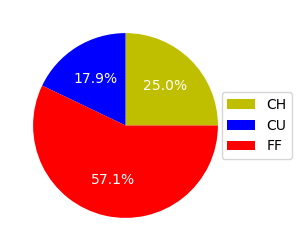

In [45]:
pitch_types = ['CH', 'CU', 'FF']

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"
wedges, texts, autotexts = ax.pie(LHB_pie_data[1:4], 
                                  colors=['y', 'b', 'r'],
                                  autopct=lambda pct: func(pct, LHB_pie_data),
                                  textprops=dict(color="w"))
ax.legend(wedges, pitch_types,
          loc="right",
          bbox_to_anchor=(0.75, 0, 0.5, 1))
plt.show()

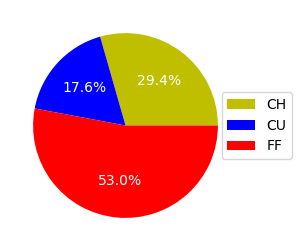

In [46]:
fig, ax = plt.subplots(figsize=(6, 3))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"
wedges, texts, autotexts = ax.pie(RHB_pie_data[1:4], 
                                  colors=['y', 'b', 'r'],
                                  autopct=lambda pct: func(pct, RHB_pie_data),
                                  textprops=dict(color="w"))
ax.legend(wedges, pitch_types,
          loc="right",
          bbox_to_anchor=(0.75, 0, 0.5, 1))
plt.show()

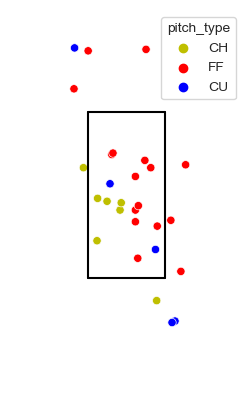

In [74]:
sns.set_style('white');
fig, ax = plt.subplots(figsize=(3, 5))
sns.scatterplot(
    data=delugo_data[delugo_data['stand'] == 'L'], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'FF': 'r'});
plt.plot([-9.97/12, 9.97/12], [44.08/12, 44.08/12], color='k');
plt.plot([9.97/12, 9.97/12], [18.29/12, 44.08/12], color='k');
plt.plot([-9.97/12, 9.97/12], [18.29/12, 18.29/12], color='k');
plt.plot([-9.97/12, -9.97/12], [18.29/12, 44.08/12], color='k');
ax.set_xlim(left=-2.5, right=2.5);
ax.set_ylim(bottom=0, top=5);

plt.axis('off')

sns.despine(fig=fig, top=True, bottom=True, left=True, right=True);

plt.show()

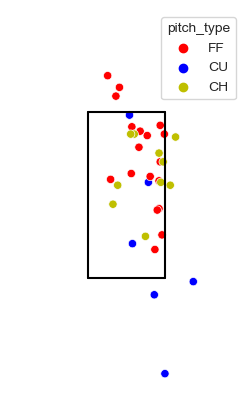

In [75]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(3, 5))
sns.scatterplot(
    data=delugo_data[delugo_data['stand'] == 'R'], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'FF': 'r'});
plt.plot([-9.97/12, 9.97/12], [44.08/12, 44.08/12], color='k');
plt.plot([9.97/12, 9.97/12], [18.29/12, 44.08/12], color='k');
plt.plot([-9.97/12, 9.97/12], [18.29/12, 18.29/12], color='k');
plt.plot([-9.97/12, -9.97/12], [18.29/12, 44.08/12], color='k');
ax.set_xlim(left=-2.5, right=2.5);
ax.set_ylim(bottom=0, top=5);

plt.axis('off')

sns.despine(fig=fig, top=True, bottom=True, left=True, right=True);

plt.show()

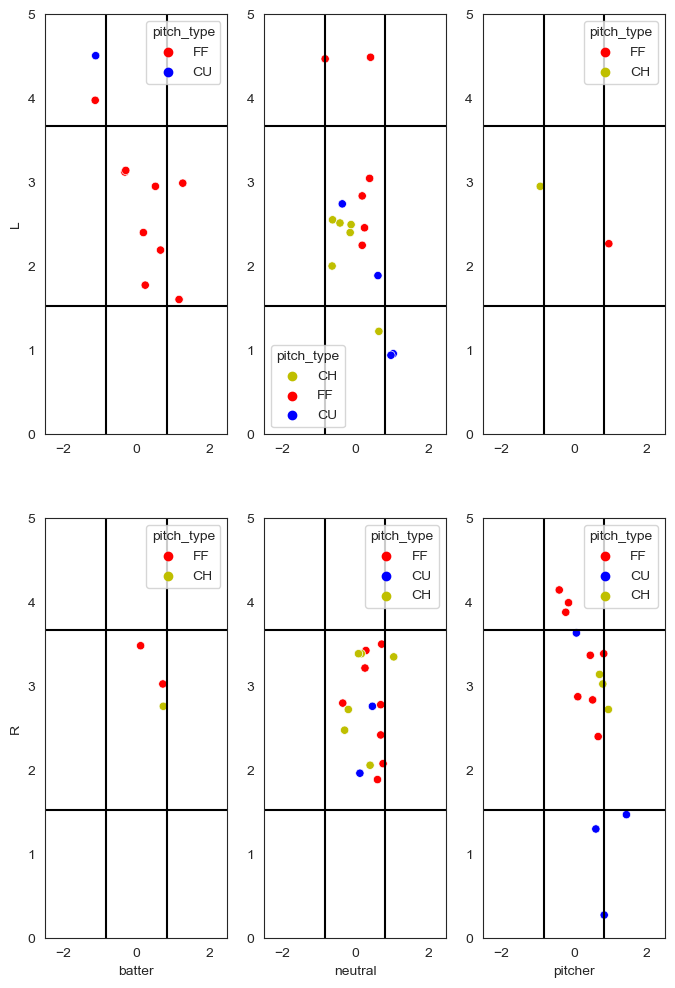

In [84]:


fig, ax = plt.subplots(2, 3, figsize=(8, 12))
sns.scatterplot(
    data=delugo_data.loc[(delugo_data['stand'] == 'L') & (delugo_data['count_advantage'] == 'batter'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'FF': 'r'}, ax=ax[0, 0]);
sns.scatterplot(
    data=delugo_data.loc[(delugo_data['stand'] == 'L') & (delugo_data['count_advantage'] == 'neutral'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'FF': 'r'}, ax=ax[0, 1]);
sns.scatterplot(
    data=delugo_data.loc[(delugo_data['stand'] == 'L') & (delugo_data['count_advantage'] == 'pitcher'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'FF': 'r'}, ax=ax[0, 2]);
sns.scatterplot(
    data=delugo_data.loc[(delugo_data['stand'] == 'R') & (delugo_data['count_advantage'] == 'batter'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'FF': 'r'}, ax=ax[1, 0]);
sns.scatterplot(
    data=delugo_data.loc[(delugo_data['stand'] == 'R') & (delugo_data['count_advantage'] == 'neutral'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'FF': 'r'}, ax=ax[1, 1]);
sns.scatterplot(
    data=delugo_data.loc[(delugo_data['stand'] == 'R') & (delugo_data['count_advantage'] == 'pitcher'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'FF': 'r'}, ax=ax[1, 2]);
# plt.plot([-9.97/12, 9.97/12], [44.08/12, 44.08/12], color='k');
# plt.plot([9.97/12, 9.97/12], [18.29/12, 44.08/12], color='k');
# plt.plot([-9.97/12, 9.97/12], [18.29/12, 18.29/12], color='k');
# plt.plot([-9.97/12, -9.97/12], [18.29/12, 44.08/12], color='k');
# ax.set_xlim(left=-2.5, right=2.5);
# ax.set_ylim(bottom=0, top=5);

for i in range(2):
    for j in range(3):
        ax[i, j].axline((-9.97, 44.08/12), (9.97/12, 44.08/12), color='k');
        ax[i, j].axline((9.97/12, 18.29/12), (9.97/12, 44.08/12), color='k');
        ax[i, j].axline((-9.97/12, 18.29/12), (9.97/12, 18.29/12), color='k');
        ax[i, j].axline((-9.97/12, 18.29/12), (-9.97/12, 44.08/12), color='k');
        ax[i, j].set_xlim(left=-2.5, right=2.5);
        ax[i, j].set_ylim(bottom=0, top=5);

ax[0, 0].set_xlabel("");
ax[0, 0].set_ylabel("L");
ax[0, 1].set_xlabel("");
ax[0, 1].set_ylabel("");
ax[0, 2].set_xlabel("");
ax[0, 2].set_ylabel("");
ax[1, 0].set_ylabel("R");
ax[1, 0].set_xlabel("batter");
ax[1, 1].set_xlabel("neutral");
ax[1, 1].set_ylabel("");
ax[1, 2].set_xlabel("pitcher");
ax[1, 2].set_ylabel("");

plt.show()